In [123]:
import pandas as pd 
import numpy
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [124]:
l1 = [file for file in os.listdir('Sales_Data')]
all_months = pd.DataFrame()
for file in l1:
    df = pd.read_csv('Sales_Data/'+file)
    all_months=pd.concat([all_months,df])
all_months.to_csv('all_data.csv',index=False)

In [ ]:
df = pd.read_csv('all_data.csv')
df

In [126]:
#cleaning
df[df.isna().any(axis=1)]
df = df.dropna(how='all') #dropping null or NaN values
df = df[df['Order Date'].str[0:2]!='Or']
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])

In [127]:
# augment a month column
df['month'] = df['Order Date'].str[0:2] #here with .str[] we can access each str in list
df['month'] = df['month'].astype(int)
#augment a sales column
df['sales'] = (df['Price Each'])*(df['Quantity Ordered'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


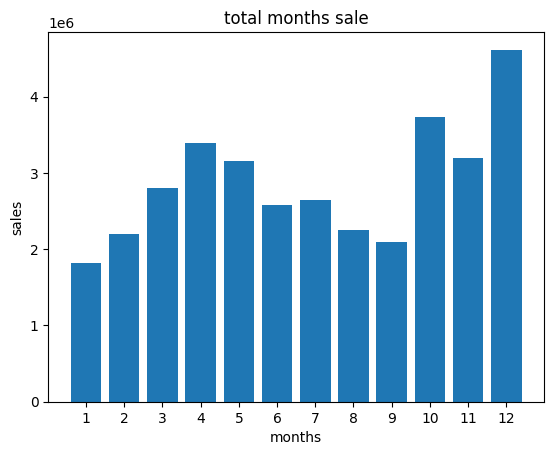

In [128]:
#best month for sales?
total_month_sale = df.groupby('month').sum()
total_month_sale
plt.bar(range(1,13),total_month_sale['sales'])
plt.xlabel('months')
plt.ylabel('sales')
plt.xticks(range(1,13)) #to see every month
plt.title('total months sale')
plt.show()

#best performing month is December

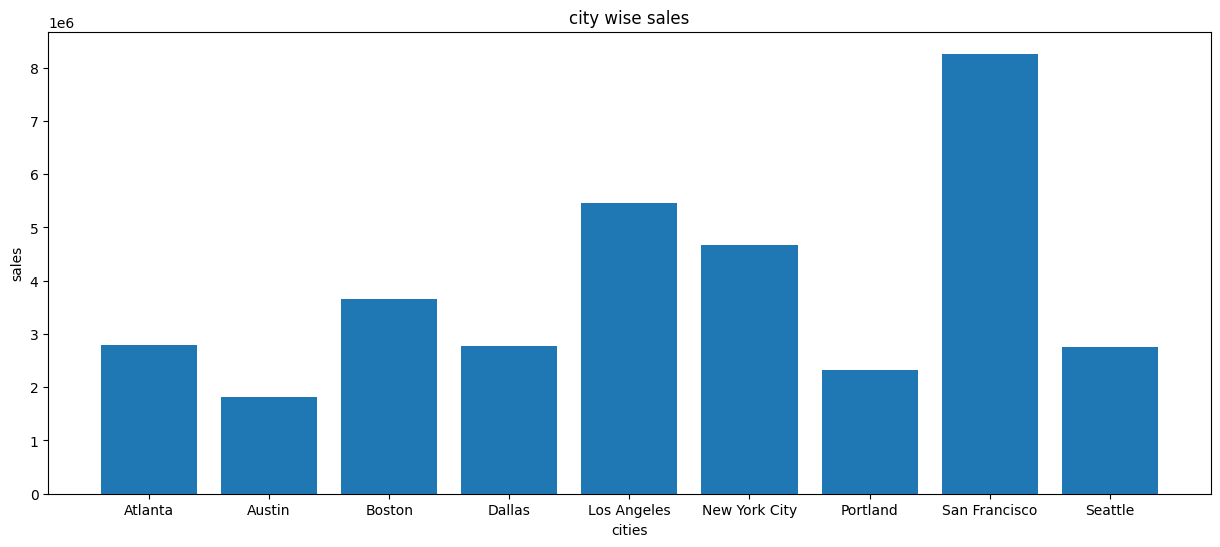

In [129]:
#which city has most sales?
l = [city[1].strip() for city in df['Purchase Address'].str.split(',')]
df['city']=l
city_wise_sales = df.groupby('city').sum()
city_wise_sales.reset_index(inplace=True)
plt.figure(figsize=(15, 6))
plt.bar(city_wise_sales['city'],city_wise_sales['sales'])
plt.xlabel('cities')
plt.ylabel('sales')
plt.xticks(city_wise_sales['city'])
plt.title('city wise sales')
plt.show()

#best performing city is San Francisco

C:\Users\rattl\AppData\Local\Temp\ipykernel_17740\2473280452.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'])


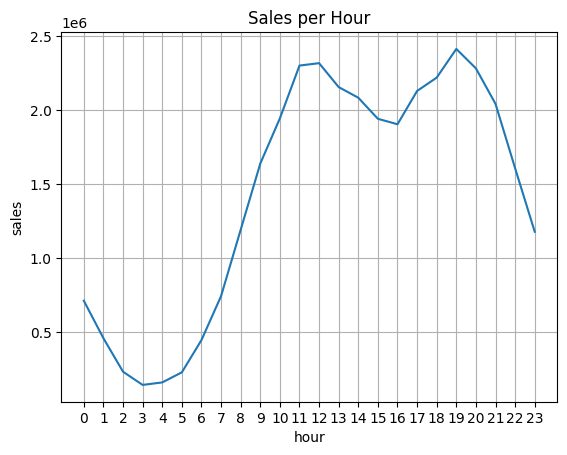

In [130]:
#which hour is best for advertisements?
df['Order Date']=pd.to_datetime(df['Order Date'])
df['hour']=df['Order Date'].dt.hour
df['minute']=df['Order Date'].dt.minute
plt.plot(range(0,24),df.groupby('hour')['sales'].sum())
plt.xlabel('hour')
plt.ylabel('sales')
plt.xticks(range(0,24))
plt.grid()
plt.title('Sales per Hour')
plt.show()

#the best hour is surely around 19:00 pm


In [ ]:
#what products are sold often together?
duplicates = df[df['Order ID'].duplicated(keep=False)]
duplicates['grouped'] = duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicates = duplicates[['Order ID','grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicates['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
# print(count)
count.most_common(10)

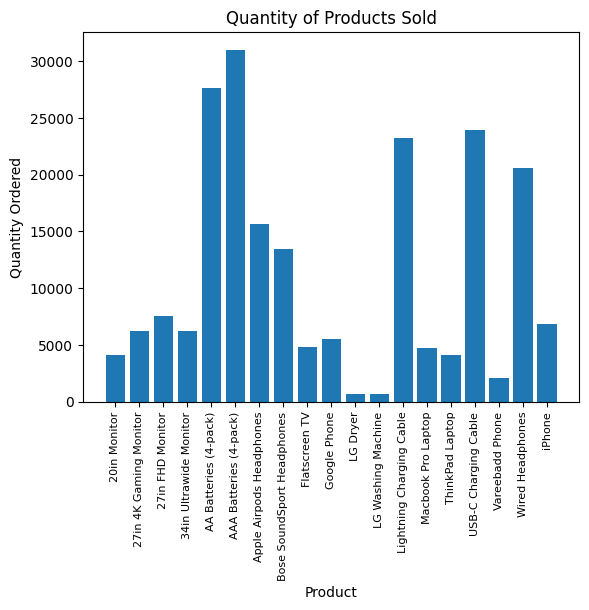

In [189]:
#what product is sold the most? why do you think it's sold the most?
product = df.groupby('Product')
product_gp=product[['Quantity Ordered']].sum()
product_gp.reset_index(inplace=True)
plt.bar(product_gp['Product'],product_gp['Quantity Ordered'])
plt.xticks(product_gp['Product'],rotation='vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity of Products Sold')
plt.show()

C:\Users\rattl\AppData\Local\Temp\ipykernel_17740\2443911094.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_gp['Product'],rotation='vertical',size=8)


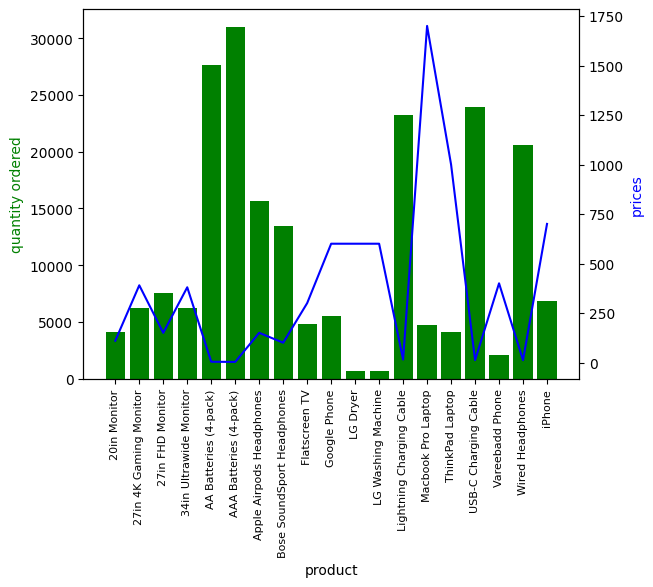

In [197]:
prices = df.groupby('Product').mean('Price Each')['Price Each']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_gp['Product'],product_gp['Quantity Ordered'],color='g')
ax2.plot(product_gp['Product'],prices,color='b')
ax1.set_xlabel('product')
ax1.set_ylabel('quantity ordered',color='g')
ax2.set_ylabel('prices',color='b')
ax1.set_xticklabels(product_gp['Product'],rotation='vertical',size=8)
plt.show()

In [198]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64